Enter the number of queens (N): 8


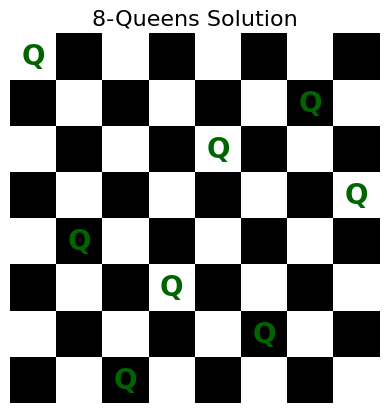

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualizeBoard(board, N):
    fig, ax = plt.subplots()

    # Create the checkerboard pattern
    for i in range(N):
        for j in range(N):
            color = 'white' if (i + j) % 2 == 0 else 'black'
            rect = plt.Rectangle((j, i), 1, 1, facecolor=color)
            ax.add_patch(rect)
            if board[i][j] == 1:
                ax.text(j + 0.5, i + 0.5, 'Q', va='center', ha='center', fontsize=20, color='darkgreen', fontweight='bold')

    ax.set_xlim(0, N)
    ax.set_ylim(0, N)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.gca().invert_yaxis()  # Flip the board to match typical chess orientation
    plt.title(f"{N}-Queens Solution", fontsize=16)
    plt.show()

def isSafe(board, row, col, N):
    for i in range(col):
        if board[row][i] == 1:
            return False
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
    for i, j in zip(range(row, N, 1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
    return True

def solveNQUtil(board, col, N):
    if col >= N:
        return True
    for i in range(N):
        if isSafe(board, i, col, N):
            board[i][col] = 1
            if solveNQUtil(board, col + 1, N) == True:
                return True
            board[i][col] = 0
    return False

def solveNQ(N):
    board = [[0 for _ in range(N)] for _ in range(N)]
    if solveNQUtil(board, 0, N) == False:
        print("No solution exists for N = 2 or N = 3.")
    else:
        visualizeBoard(board, N)

# Get input from user
try:
    N = int(input("Enter the number of queens (N): "))
    if N < 1:
        print("Please enter a positive integer greater than 0.")
    else:
        solveNQ(N)
except ValueError:
    print("Please enter a valid integer.")
